In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("/content/train.csv")
train.rename(columns={'дата': 'date', 'направление': 'class', 'выход': 'out'}, inplace=True)
train.date = pd.to_datetime(train.date, dayfirst=True)
#train.set_index('date', inplace = True)
train.head()

,date,class,out
0,2021-12-30,ш,"78,95"
1,2021-12-29,ш,"79,3"
2,2021-12-28,ш,"79,21"
3,2021-12-27,ш,"79,06"
4,2021-12-24,л,"78,69"


In [70]:
train[:15]

,date,class,out
0,2021-12-30,ш,"78,95"
1,2021-12-29,ш,"79,3"
2,2021-12-28,ш,"79,21"
3,2021-12-27,ш,"79,06"
4,2021-12-24,л,"78,69"
5,2021-12-23,ш,"75,75"
6,2021-12-22,ш,"76,9"
7,2021-12-21,ш,"75,45"
8,2021-12-20,ш,"74,16"
9,2021-12-17,ш,"71,86"


In [89]:
train.out = train.out.str.replace(',', '.').astype(float)
train.head()

,date,class,out
0,2021-12-30,ш,78.95
1,2021-12-29,ш,79.30
2,2021-12-28,ш,79.21
3,2021-12-27,ш,79.06
4,2021-12-24,л,78.69


<Axes: xlabel='date'>

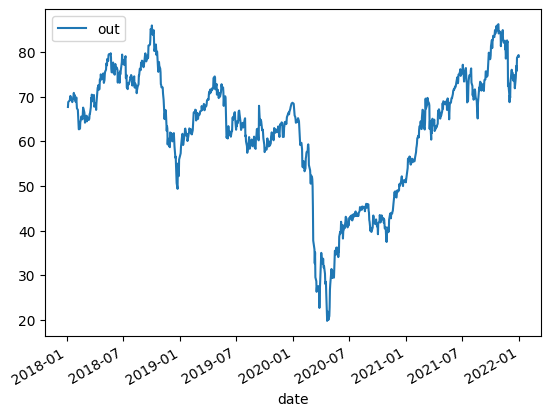

In [56]:
train.plot()

In [90]:
test = pd.read_csv("/content/test.csv")
test.rename(columns={'дата': 'date', 'направление': 'class', 'выход': 'out'}, inplace=True)
test.date = pd.to_datetime(test.date, dayfirst=True)
test.head()

,date,class,out
0,2022-01-03,NaN,NaN
1,2022-01-04,NaN,NaN
2,2022-01-05,NaN,NaN
3,2022-01-06,NaN,NaN
4,2022-01-07,NaN,NaN


In [73]:
train.head()

,date,class,out
0,2021-12-30,ш,78.95
1,2021-12-29,ш,79.30
2,2021-12-28,ш,79.21
3,2021-12-27,ш,79.06
4,2021-12-24,л,78.69


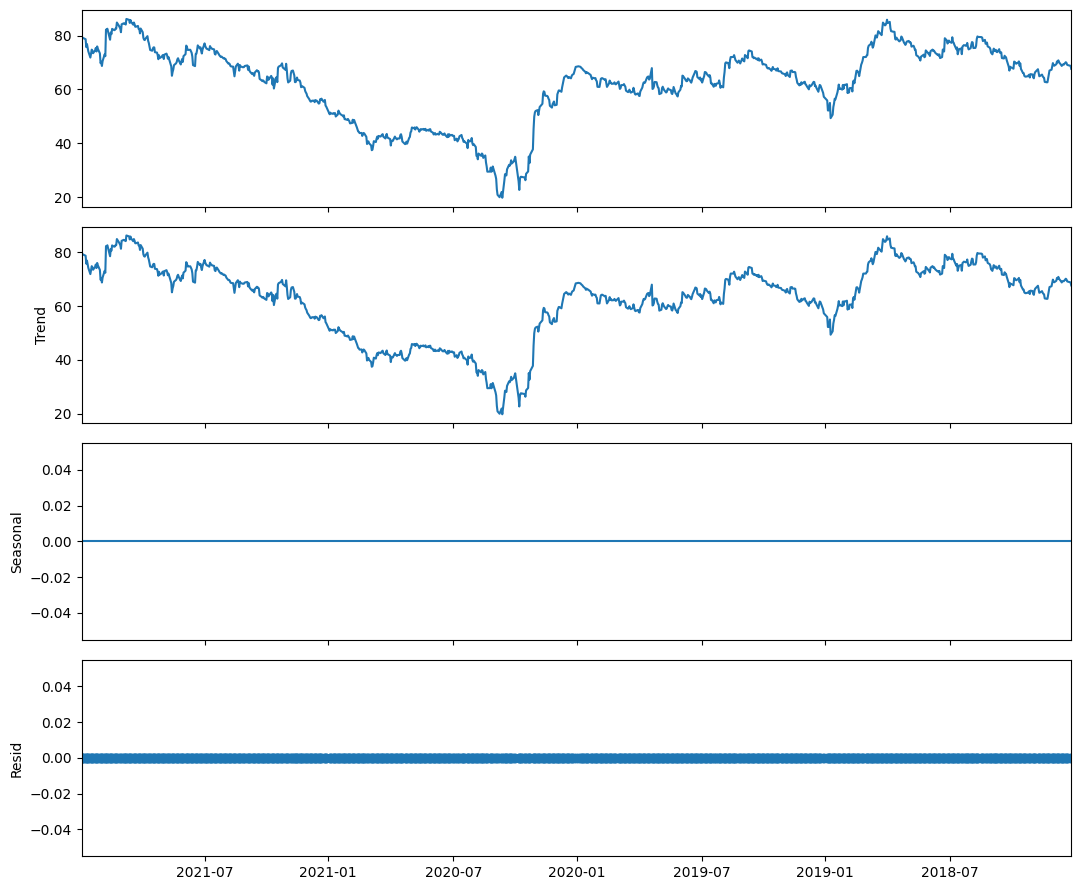

In [74]:
# импортируем функцию seasonal_decompose из statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

local_train = train.set_index('date')
# применяем функцию к данным о перевозках
decompose = seasonal_decompose(local_train.drop('class', axis=1), period=1)
decompose.plot()

plt.show()

In [11]:
!pip install pystan

  Using cached pystan-3.9.0-py3-none-any.whl (13 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (45.3 MB)
  Using cached pysimdjson-5.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached marshmallow-3.21.1-py3-none-any.whl (49 kB)
  Using cached webargs-8.4.0-py3-none-any.whl (31 kB)


In [13]:
!python -m pip install prophet

In [15]:
from prophet import Prophet

In [75]:
# Drop the columns
train_prophet = train.drop(['class'], axis=1)
train_prophet.rename(columns={'out': 'y', 'date': 'ds'}, inplace=True)

train_prophet.head()

,ds,y
0,2021-12-30,78.95
1,2021-12-29,79.30
2,2021-12-28,79.21
3,2021-12-27,79.06
4,2021-12-24,78.69


In [76]:
test_prophet = test.drop(['class', 'out'], axis=1)
test_prophet.rename(columns={'date': 'ds'}, inplace=True)

test_prophet = pd.concat([test_prophet, train_prophet.drop(['y'], axis=1)])
test_prophet.head()

,ds
0,2022-01-03
1,2022-01-04
2,2022-01-05
3,2022-01-06
4,2022-01-07


In [77]:
test_prophet.tail()

,ds
996,2018-01-11
997,2018-01-10
998,2018-01-09
999,2018-01-05
1000,2018-01-04


In [78]:
model = Prophet()

model.fit(train_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbxfx9zbe/1toef8ey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbxfx9zbe/umy0qpkq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36627', 'data', 'file=/tmp/tmpbxfx9zbe/1toef8ey.json', 'init=/tmp/tmpbxfx9zbe/umy0qpkq.json', 'output', 'file=/tmp/tmpbxfx9zbe/prophet_model0du1p857/prophet_model-20240324154940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:49:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:49:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [79]:
future_out = model.make_future_dataframe(periods=365)

# Predict
forecast = model.predict(future_out)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1361,2022-12-26,108.551217,83.752489,134.747805
1362,2022-12-27,108.801936,84.316321,134.845104
1363,2022-12-28,109.176625,82.671053,135.442655
1364,2022-12-29,109.512713,84.187723,136.139090
1365,2022-12-30,109.747435,84.211154,136.050460


In [80]:
future_out

,ds
0,2018-01-04
1,2018-01-05
2,2018-01-09
3,2018-01-10
4,2018-01-11
...,...
1361,2022-12-26
1362,2022-12-27
1363,2022-12-28
1364,2022-12-29


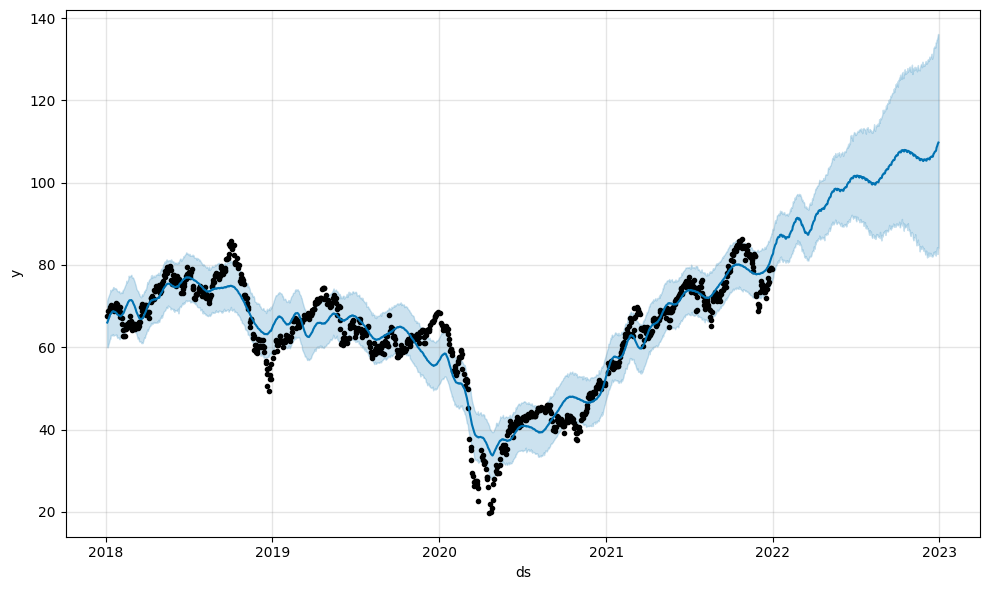

In [81]:
fig = model.plot(forecast)

plt.show()

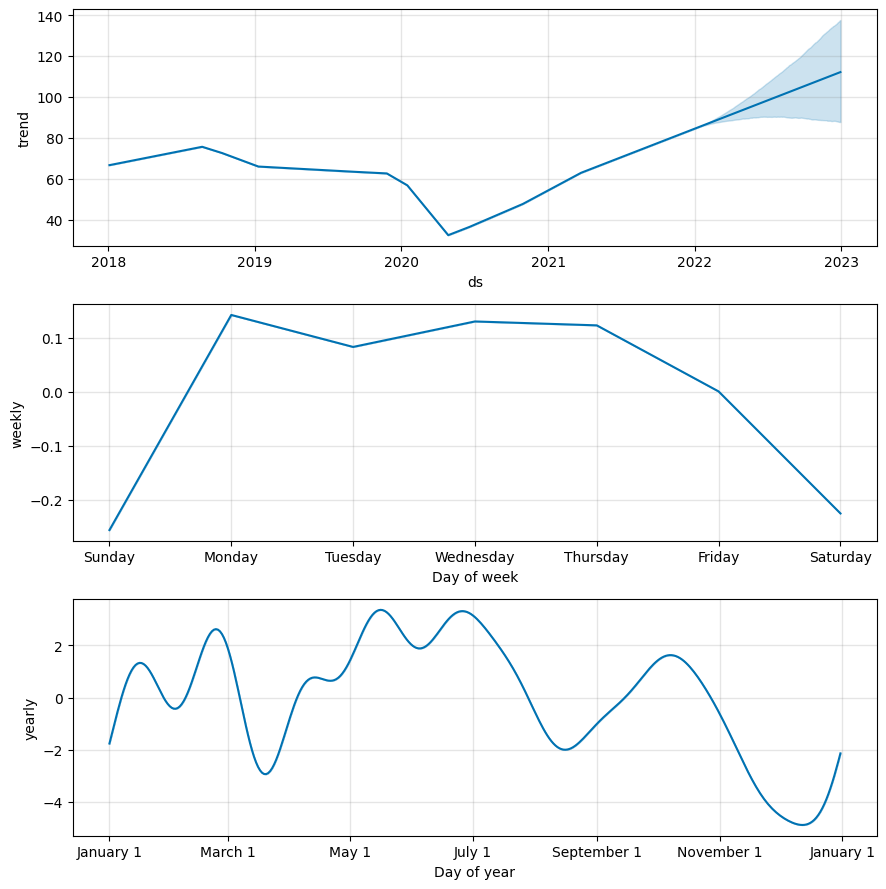

In [82]:
fig_components = model.plot_components(forecast)
plt.show()

In [83]:
# Predict
forecast = model.predict(test_prophet)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1044,2022-03-25,88.494717,81.839335,94.974102
1045,2022-03-28,89.507603,83.011157,96.002630
1046,2022-03-29,89.767741,83.846589,96.714795
1047,2022-03-30,90.140255,83.941957,96.237478
1048,2022-03-31,90.459187,83.947686,97.008748


In [84]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-04,66.794979,60.231245,71.476427,66.794979,66.794979,-0.799448,-0.799448,-0.799448,0.123336,0.123336,0.123336,-0.922784,-0.922784,-0.922784,0.0,0.0,0.0,65.995530
1,2018-01-05,66.833821,59.816180,72.407584,66.833821,66.833821,-0.622136,-0.622136,-0.622136,0.000971,0.000971,0.000971,-0.623107,-0.623107,-0.623107,0.0,0.0,0.0,66.211685
2,2018-01-09,66.989189,61.969655,73.425515,66.989189,66.989189,0.523526,0.523526,0.523526,0.083354,0.083354,0.083354,0.440172,0.440172,0.440172,0.0,0.0,0.0,67.512715
3,2018-01-10,67.028032,62.170619,73.690098,67.028032,67.028032,0.785417,0.785417,0.785417,0.130565,0.130565,0.130565,0.654853,0.654853,0.654853,0.0,0.0,0.0,67.813449
4,2018-01-11,67.066874,62.576969,73.469231,67.066874,67.066874,0.966454,0.966454,0.966454,0.123336,0.123336,0.123336,0.843118,0.843118,0.843118,0.0,0.0,0.0,68.033327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2022-03-25,90.935091,81.839335,94.974102,88.454426,93.408348,-2.440374,-2.440374,-2.440374,0.000971,0.000971,0.000971,-2.441345,-2.441345,-2.441345,0.0,0.0,0.0,88.494717
1045,2022-03-28,91.163567,83.011157,96.002630,88.563936,93.695772,-1.655964,-1.655964,-1.655964,0.142610,0.142610,0.142610,-1.798574,-1.798574,-1.798574,0.0,0.0,0.0,89.507603
1046,2022-03-29,91.239726,83.846589,96.714795,88.520382,93.858347,-1.471985,-1.471985,-1.471985,0.083354,0.083354,0.083354,-1.555340,-1.555340,-1.555340,0.0,0.0,0.0,89.767741
1047,2022-03-30,91.315885,83.941957,96.237478,88.487155,94.030650,-1.175630,-1.175630,-1.175630,0.130565,0.130565,0.130565,-1.306195,-1.306195,-1.306195,0.0,0.0,0.0,90.140255


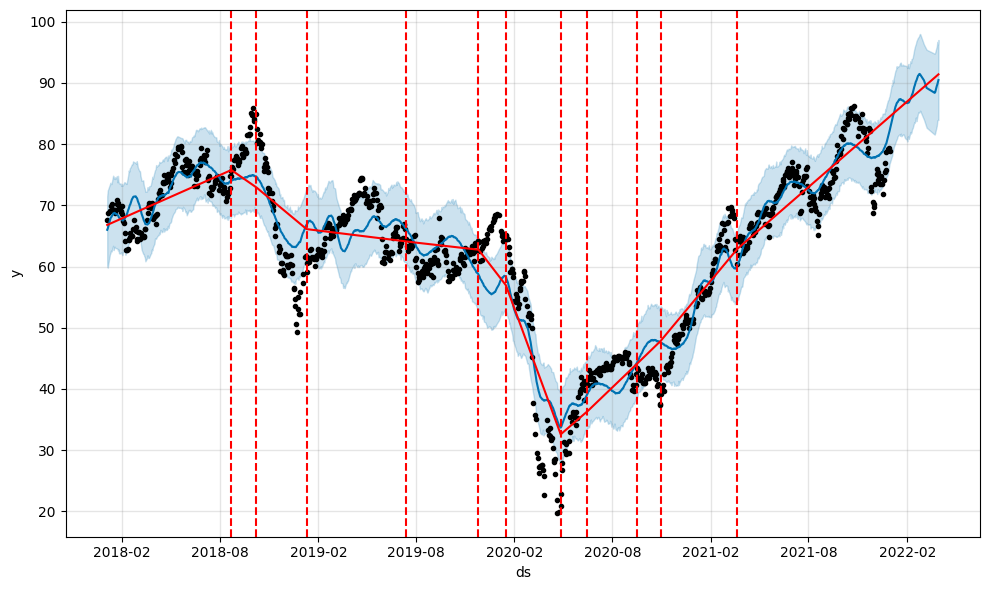

In [87]:
fig = model.plot(forecast)
from prophet.plot import add_changepoints_to_plot
a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

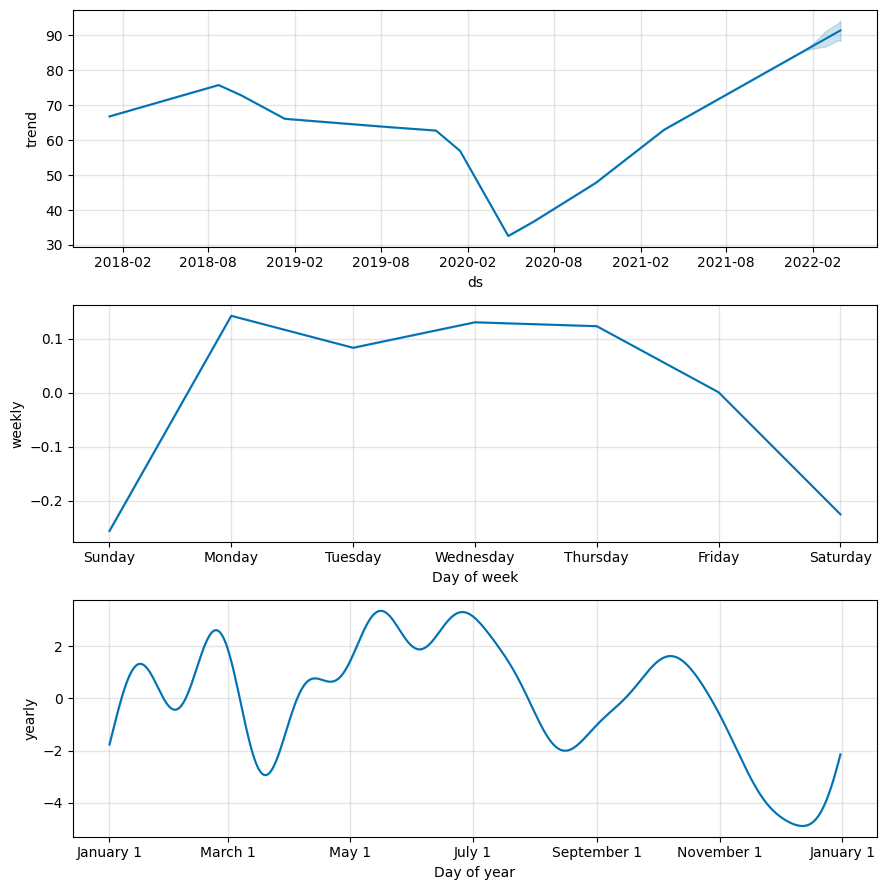

In [86]:
fig_components = model.plot_components(forecast)
plt.show()

In [91]:
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 6.8 MB/s eta 0:00:00


In [92]:
import tsfresh

In [139]:
columns = ['id', 'date', 'out', 'y']
features = pd.DataFrame(columns=columns)
features

,id,date,out,y


In [140]:
columns_y = ['y']
target = pd.DataFrame(columns=columns_y)
target

,y


In [109]:
base = train.sort_values(by='date').set_index(train.index)
base = base.replace({'л': 1, 'ш': 0})
base

,date,class,out
0,2018-01-04,0,67.67
1,2018-01-05,1,68.78
2,2018-01-09,0,69.06
3,2018-01-10,0,69.15
4,2018-01-11,1,69.86
...,...,...,...
996,2021-12-24,1,78.69
997,2021-12-27,0,79.06
998,2021-12-28,0,79.21
999,2021-12-29,0,79.30


In [249]:
base_1 = pd.concat([base, test.set_index(test.index+1001)])

base_1[1001:]

,date,class,out
1001,2022-01-03,NaN,NaN
1002,2022-01-04,NaN,NaN
1003,2022-01-05,NaN,NaN
1004,2022-01-06,NaN,NaN
1005,2022-01-07,NaN,NaN
1006,2022-01-10,NaN,NaN
1007,2022-01-11,NaN,NaN
1008,2022-01-12,NaN,NaN
1009,2022-01-13,NaN,NaN
1010,2022-01-14,NaN,NaN


In [ ]:
for index, row in base.iterrows():
  print(index, row['date'], row['out'])

In [141]:
window = 6
for index, row in base.iterrows():

  for i in range(index - window - 1, index + 1):
    if i >= 0:
      features.loc[len(features.index)] = [index+1, base.iloc[i]['date'], base.iloc[i]['out'], row['class']]
  target.loc[len(target.index)+1] = [row['class']]


In [149]:
features = features.drop('y', axis=1)

In [187]:
features[:45]

,id,date,out
0,1,2018-01-04,67.67
1,2,2018-01-04,67.67
2,2,2018-01-05,68.78
3,3,2018-01-04,67.67
4,3,2018-01-05,68.78
5,3,2018-01-09,69.06
6,4,2018-01-04,67.67
7,4,2018-01-05,68.78
8,4,2018-01-09,69.06
9,4,2018-01-10,69.15


In [131]:
target = features.drop(['date', 'out'], axis=1).drop_duplicates()

In [143]:
target['y']

1       0
2       1
3       0
4       0
5       1
       ..
997     1
998     0
999     0
1000    0
1001    0
Name: y, Length: 1001, dtype: int64

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(base.drop('class', axis=1), base['class'], test_size=.2)
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)
print(classification_report(y_test, cl.predict(X_test)))

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>)

In [154]:
from tsfresh import extract_relevant_features
features_filtered_direct = extract_relevant_features(features, target['y'],
                                                     column_id='id', column_sort='date', ml_task='classification')

Feature Extraction: 100%|██████████| 1001/1001 [01:04<00:00, 15.43it/s]


In [155]:
features_filtered_direct

,"out__fft_coefficient__attr_""imag""__coeff_3",out__mean_second_derivative_central,out__energy_ratio_by_chunks__num_segments_10__segment_focus_7,"out__fft_coefficient__attr_""imag""__coeff_2","out__fft_coefficient__attr_""real""__coeff_4","out__fft_coefficient__attr_""real""__coeff_3","out__fft_coefficient__attr_""angle""__coeff_3","out__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.0",out__mean_change,"out__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.2","out__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.6","out__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.4",out__number_peaks__n_1,"out__fft_coefficient__attr_""angle""__coeff_4"
1,0.098683,5.921189e-16,0.000000,0.410000,-0.235,-0.337480,12.763385,0.000000,0.086429,0.0000,0.000,0.000000,0.0,180.0
2,0.098683,5.921189e-16,0.000000,0.410000,-0.235,-0.337480,12.763385,1.110000,1.110000,0.0000,0.000,0.000000,0.0,180.0
3,0.098683,-4.150000e-01,0.000000,0.410000,-0.235,-0.337480,12.763385,0.695000,0.695000,0.2800,0.000,0.280000,0.0,180.0
4,0.098683,-2.550000e-01,0.000000,0.000000,-0.235,-0.337480,12.763385,0.493333,0.493333,0.1850,0.090,0.090000,0.0,180.0
5,0.098683,-6.666667e-02,0.000000,0.549213,-0.235,-0.337480,12.763385,0.547500,0.547500,0.3600,0.710,0.400000,0.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1.766854,3.600000e-01,0.137028,2.520000,-5.310,-1.389533,128.183093,0.554286,0.554286,1.1325,0.895,1.080000,1.0,180.0
998,0.773301,1.616667e-01,0.136347,6.900000,1.060,-3.272010,166.702812,0.804286,0.804286,0.9800,0.370,0.902500,1.0,0.0
999,1.226610,-1.791667e-01,0.134280,3.260000,-6.840,-2.320223,152.136357,1.050000,1.050000,0.7520,0.260,0.577500,1.0,180.0
1000,2.752885,-1.000000e-01,0.131423,0.540000,-0.600,-4.487574,148.473128,0.734286,0.734286,0.4800,0.120,0.203333,1.0,180.0


In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(features_filtered_direct, target, test_size=.2)
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)
print(classification_report(y_test, cl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.49      0.46      0.48        96
           1       0.54      0.57      0.55       105

    accuracy                           0.52       201
   macro avg       0.52      0.51      0.51       201
weighted avg       0.52      0.52      0.52       201



In [157]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train, y_train)
print(classification_report(y_test, cl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.49      0.46      0.48        96
           1       0.54      0.57      0.55       105

    accuracy                           0.52       201
   macro avg       0.52      0.51      0.51       201
weighted avg       0.52      0.52      0.52       201



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [162]:
forecast_clf = forecast[:1001]
forecast_clf

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-04,66.794979,60.231245,71.476427,66.794979,66.794979,-0.799448,-0.799448,-0.799448,0.123336,0.123336,0.123336,-0.922784,-0.922784,-0.922784,0.0,0.0,0.0,65.995530
1,2018-01-05,66.833821,59.816180,72.407584,66.833821,66.833821,-0.622136,-0.622136,-0.622136,0.000971,0.000971,0.000971,-0.623107,-0.623107,-0.623107,0.0,0.0,0.0,66.211685
2,2018-01-09,66.989189,61.969655,73.425515,66.989189,66.989189,0.523526,0.523526,0.523526,0.083354,0.083354,0.083354,0.440172,0.440172,0.440172,0.0,0.0,0.0,67.512715
3,2018-01-10,67.028032,62.170619,73.690098,67.028032,67.028032,0.785417,0.785417,0.785417,0.130565,0.130565,0.130565,0.654853,0.654853,0.654853,0.0,0.0,0.0,67.813449
4,2018-01-11,67.066874,62.576969,73.469231,67.066874,67.066874,0.966454,0.966454,0.966454,0.123336,0.123336,0.123336,0.843118,0.843118,0.843118,0.0,0.0,0.0,68.033327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2021-12-24,84.004638,74.574688,86.160665,84.004638,84.004638,-3.908835,-3.908835,-3.908835,0.000971,0.000971,0.000971,-3.909806,-3.909806,-3.909806,0.0,0.0,0.0,80.095803
997,2021-12-27,84.233115,75.061314,87.144764,84.233115,84.233115,-3.108644,-3.108644,-3.108644,0.142610,0.142610,0.142610,-3.251255,-3.251255,-3.251255,0.0,0.0,0.0,81.124470
998,2021-12-28,84.309273,75.916333,87.160636,84.309273,84.309273,-2.912449,-2.912449,-2.912449,0.083354,0.083354,0.083354,-2.995803,-2.995803,-2.995803,0.0,0.0,0.0,81.396825
999,2021-12-29,84.385432,76.182881,87.578810,84.385432,84.385432,-2.594429,-2.594429,-2.594429,0.130565,0.130565,0.130565,-2.724994,-2.724994,-2.724994,0.0,0.0,0.0,81.791003


In [163]:
base['class']

0       0
1       1
2       0
3       0
4       1
       ..
996     1
997     0
998     0
999     0
1000    0
Name: class, Length: 1001, dtype: int64

In [165]:
X_train, X_test, y_train, y_test = train_test_split(forecast_clf.drop('ds', axis=1), base['class'], test_size=.2)
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)
print(classification_report(y_test, cl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.51      0.43      0.47        97
           1       0.53      0.61      0.57       104

    accuracy                           0.52       201
   macro avg       0.52      0.52      0.52       201
weighted avg       0.52      0.52      0.52       201



In [224]:
list(forecast_clf.columns)

['ds',
 'trend',
 'yhat_lower',
 'yhat_upper',
 'trend_lower',
 'trend_upper',
 'additive_terms',
 'additive_terms_lower',
 'additive_terms_upper',
 'weekly',
 'weekly_lower',
 'weekly_upper',
 'yearly',
 'yearly_lower',
 'yearly_upper',
 'multiplicative_terms',
 'multiplicative_terms_lower',
 'multiplicative_terms_upper',
 'yhat']

In [225]:
features_fr = pd.DataFrame(columns = ['id', 'ds',
 'trend',
 'yhat_lower',
 'yhat_upper',
 'trend_lower',
 'trend_upper',
 'additive_terms',
 'additive_terms_lower',
 'additive_terms_upper',
 'weekly',
 'weekly_lower',
 'weekly_upper',
 'yearly',
 'yearly_lower',
 'yearly_upper',
 'multiplicative_terms',
 'multiplicative_terms_lower',
 'multiplicative_terms_upper',
 'yhat'])
features_fr

,id,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat


In [174]:
target

,y
1,0
2,1
3,0
4,0
5,1
...,...
997,1
998,0
999,0
1000,0


In [226]:
window = 5
for index, row in forecast_clf.iterrows():

  for i in range(index - window + 1, index + 1):
    if i >= 0:
      #print([index+1]+ list(forecast_clf.iloc[i].values))
      features_fr.loc[len(features_fr.index)] = list([index+1])+ list(forecast_clf.iloc[i].values)
  #target_fr.loc[len(target.index)+1] = [row['class']]

In [227]:
features_fr

,id,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1,2018-01-04,66.794979,60.231245,71.476427,66.794979,66.794979,-0.799448,-0.799448,-0.799448,0.123336,0.123336,0.123336,-0.922784,-0.922784,-0.922784,0.0,0.0,0.0,65.995530
1,2,2018-01-04,66.794979,60.231245,71.476427,66.794979,66.794979,-0.799448,-0.799448,-0.799448,0.123336,0.123336,0.123336,-0.922784,-0.922784,-0.922784,0.0,0.0,0.0,65.995530
2,2,2018-01-05,66.833821,59.816180,72.407584,66.833821,66.833821,-0.622136,-0.622136,-0.622136,0.000971,0.000971,0.000971,-0.623107,-0.623107,-0.623107,0.0,0.0,0.0,66.211685
3,3,2018-01-04,66.794979,60.231245,71.476427,66.794979,66.794979,-0.799448,-0.799448,-0.799448,0.123336,0.123336,0.123336,-0.922784,-0.922784,-0.922784,0.0,0.0,0.0,65.995530
4,3,2018-01-05,66.833821,59.816180,72.407584,66.833821,66.833821,-0.622136,-0.622136,-0.622136,0.000971,0.000971,0.000971,-0.623107,-0.623107,-0.623107,0.0,0.0,0.0,66.211685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,1001,2021-12-24,84.004638,74.574688,86.160665,84.004638,84.004638,-3.908835,-3.908835,-3.908835,0.000971,0.000971,0.000971,-3.909806,-3.909806,-3.909806,0.0,0.0,0.0,80.095803
4991,1001,2021-12-27,84.233115,75.061314,87.144764,84.233115,84.233115,-3.108644,-3.108644,-3.108644,0.142610,0.142610,0.142610,-3.251255,-3.251255,-3.251255,0.0,0.0,0.0,81.124470
4992,1001,2021-12-28,84.309273,75.916333,87.160636,84.309273,84.309273,-2.912449,-2.912449,-2.912449,0.083354,0.083354,0.083354,-2.995803,-2.995803,-2.995803,0.0,0.0,0.0,81.396825
4993,1001,2021-12-29,84.385432,76.182881,87.578810,84.385432,84.385432,-2.594429,-2.594429,-2.594429,0.130565,0.130565,0.130565,-2.724994,-2.724994,-2.724994,0.0,0.0,0.0,81.791003


In [199]:
set(features_fr['id']) - set(target['y'])

{('id',)}

In [210]:
print (target['y'][target['y'] == 'id'])

Series([], Name: y, dtype: int64)


In [ ]:
set(features_fr['ds'])

In [234]:
features_fr

,id,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1,2018-01-04,66.794979,60.231245,71.476427,66.794979,66.794979,-0.799448,-0.799448,-0.799448,0.123336,0.123336,0.123336,-0.922784,-0.922784,-0.922784,0.0,0.0,0.0,65.995530
1,2,2018-01-04,66.794979,60.231245,71.476427,66.794979,66.794979,-0.799448,-0.799448,-0.799448,0.123336,0.123336,0.123336,-0.922784,-0.922784,-0.922784,0.0,0.0,0.0,65.995530
2,2,2018-01-05,66.833821,59.816180,72.407584,66.833821,66.833821,-0.622136,-0.622136,-0.622136,0.000971,0.000971,0.000971,-0.623107,-0.623107,-0.623107,0.0,0.0,0.0,66.211685
3,3,2018-01-04,66.794979,60.231245,71.476427,66.794979,66.794979,-0.799448,-0.799448,-0.799448,0.123336,0.123336,0.123336,-0.922784,-0.922784,-0.922784,0.0,0.0,0.0,65.995530
4,3,2018-01-05,66.833821,59.816180,72.407584,66.833821,66.833821,-0.622136,-0.622136,-0.622136,0.000971,0.000971,0.000971,-0.623107,-0.623107,-0.623107,0.0,0.0,0.0,66.211685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,1001,2021-12-24,84.004638,74.574688,86.160665,84.004638,84.004638,-3.908835,-3.908835,-3.908835,0.000971,0.000971,0.000971,-3.909806,-3.909806,-3.909806,0.0,0.0,0.0,80.095803
4991,1001,2021-12-27,84.233115,75.061314,87.144764,84.233115,84.233115,-3.108644,-3.108644,-3.108644,0.142610,0.142610,0.142610,-3.251255,-3.251255,-3.251255,0.0,0.0,0.0,81.124470
4992,1001,2021-12-28,84.309273,75.916333,87.160636,84.309273,84.309273,-2.912449,-2.912449,-2.912449,0.083354,0.083354,0.083354,-2.995803,-2.995803,-2.995803,0.0,0.0,0.0,81.396825
4993,1001,2021-12-29,84.385432,76.182881,87.578810,84.385432,84.385432,-2.594429,-2.594429,-2.594429,0.130565,0.130565,0.130565,-2.724994,-2.724994,-2.724994,0.0,0.0,0.0,81.791003


In [219]:
features_fr['id']

,id
0,1
1,2
2,2
3,3
4,3
...,...
9985,1001
9986,1001
9987,1001
9988,1001


In [212]:
print (features_fr['id'][features_fr['id'] == 'id'])

      id
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
...   ..
4990 NaN
4991 NaN
4992 NaN
4993 NaN
4994 NaN

[4995 rows x 1 columns]


In [230]:
features_filtered_direct_fr = extract_relevant_features(features_fr, target['y'],
                                                     column_id='id', column_sort='ds', ml_task='classification')

Feature Extraction: 100%|██████████| 18018/18018 [16:51<00:00, 17.81it/s]


In [237]:
features_filtered_direct_fr

""
1
2
3
4
5
...
997
998
999
1000


In [231]:
X_train, X_test, y_train, y_test = train_test_split(features_filtered_direct_fr, target, test_size=.2)
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)
print(classification_report(y_test, cl.predict(X_test)))

ValueError: at least one array or dtype is required

In [250]:
import json

In [251]:
with open('forecast_value.json', 'w') as file:

    json.dump(cl.predict(X_test), file)



NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [256]:


with open('forecast_class.json', 'w') as file:

    json.dump(list(forecast[1001:]['yhat']), file)

In [254]:
forecast[1001:]['yhat']

1001    83.680236
1002    84.002955
1003    84.426002
1004    84.784713
1005    85.014675
1006    86.096801
1007    86.301969
1008    86.584902
1009    86.782912
1010    86.834082
1011    87.303140
1012    87.290864
1013    87.356710
1014    87.342345
1015    87.190206
1016    87.145171
1017    87.005866
1018    86.971998
1019    86.887509
1020    86.696477
1021    86.727875
1022    86.676604
1023    86.759266
1024    86.817055
1025    86.790646
1026    87.407690
1027    87.566027
1028    87.856728
1029    88.115581
1030    88.277934
1031    89.338083
1032    89.588744
1033    89.938374
1034    90.220400
1035    90.368620
1036    91.160022
1037    91.249233
1038    91.405422
1039    91.465586
1040    91.367793
1041    90.425255
1042    89.174081
1043    88.372245
1044    88.494717
1045    89.507603
1046    89.767741
1047    90.140255
1048    90.459187
Name: yhat, dtype: float64